In [51]:
import pandas as pd

#read data
df = pd.read_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\cleaned_insurance_data.csv")
df.head()

,police_report,claim_amount,total_policy_claims,fraudulent,incident_cause_driver_error,incident_cause_natural_causes,incident_cause_other_causes,incident_cause_other_driver_error,claim_area_home,claim_type_material_and_injury,claim_type_material_only,claim_year,claim_month,claim_day,high_risk
0,0,2980.0,1.0,0,True,False,False,False,False,False,True,2017,11,27,0
1,0,2980.0,3.0,0,False,False,False,False,True,False,True,2018,10,3,0
2,0,3369.5,1.0,1,False,False,False,True,False,False,True,2018,2,2,1
3,0,1680.0,1.0,0,False,True,False,False,False,False,True,2018,6,17,0
4,0,2680.0,1.0,0,False,False,False,False,False,False,True,2018,1,13,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   police_report                      1035 non-null   int64  
 1   claim_amount                       1035 non-null   float64
 2   total_policy_claims                1035 non-null   float64
 3   fraudulent                         1035 non-null   int64  
 4   incident_cause_driver_error        1035 non-null   bool   
 5   incident_cause_natural_causes      1035 non-null   bool   
 6   incident_cause_other_causes        1035 non-null   bool   
 7   incident_cause_other_driver_error  1035 non-null   bool   
 8   claim_area_home                    1035 non-null   bool   
 9   claim_type_material_and_injury     1035 non-null   bool   
 10  claim_type_material_only           1035 non-null   bool   
 11  claim_year                         1035 non-null   int64

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features and target
X = df.drop(columns=['fraudulent','claim_amount','high_risk'])
y = df['high_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only continuous numeric columns
cols_to_scale = ['total_policy_claims', 'claim_year', 'claim_month', 'claim_day']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Logistic Regression
model = LogisticRegression(random_state=24)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent']))


                precision    recall  f1-score   support

Non-Fraudulent       0.71      0.69      0.70       102
    Fraudulent       0.70      0.72      0.71       105

      accuracy                           0.71       207
     macro avg       0.71      0.71      0.71       207
  weighted avg       0.71      0.71      0.71       207



              precision    recall  f1-score   support

           0       0.59      0.66      0.62       102
           1       0.63      0.56      0.59       105

    accuracy                           0.61       207
   macro avg       0.61      0.61      0.61       207
weighted avg       0.61      0.61      0.61       207

Train Accuracy: 0.955
Test Accuracy: 0.609


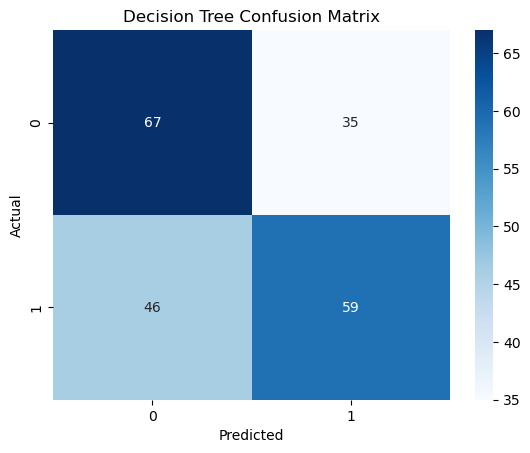

In [57]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier(random_state = 24)
dc_model.fit(X_train,y_train)
y_pred = dc_model.predict(X_test)
print(classification_report(y_test,y_pred))

train_acc = dc_model.score(X_train, y_train)
test_acc = dc_model.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.69      0.71      0.70       102
           1       0.71      0.69      0.70       105

    accuracy                           0.70       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.70      0.70       207



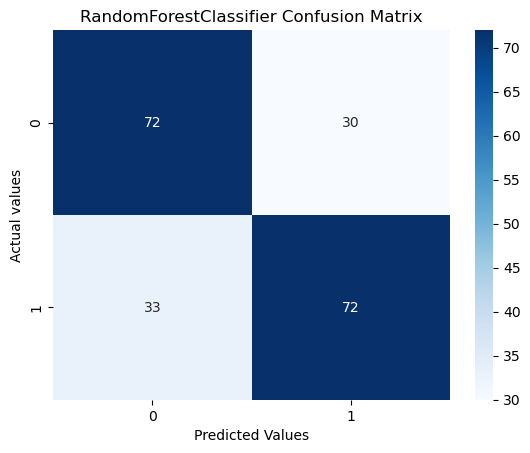

In [59]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot

model = RandomForestClassifier(random_state=24)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.74      0.70      0.72       107
           1       0.70      0.73      0.71       100

    accuracy                           0.71       207
   macro avg       0.72      0.72      0.71       207
weighted avg       0.72      0.71      0.72       207



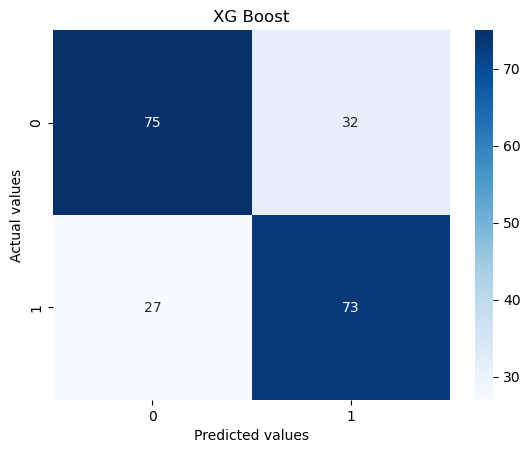

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 24)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_pred,y_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("XG Boost")
plt.show()

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_test, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

results = []

# Logistic
log_model = LogisticRegression(random_state=24, max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
results.append(evaluate_model("Logistic Regression", y_test, log_pred))

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=24)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
results.append(evaluate_model("Decision Tree", y_test, tree_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=24)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results.append(evaluate_model("Random Forest", y_test, rf_pred))

# Convert to DataFrame
pd.DataFrame(results).set_index("Model")


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.700483,0.697248,0.723810,0.710280
Decision Tree,0.608696,0.627660,0.561905,0.592965
Random Forest,0.695652,0.705882,0.685714,0.695652


In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(random_state=24), X, y, cv=5, scoring='f1')
print(f"Random Forest F1 CV Avg: {scores.mean():.3f}")


Random Forest F1 CV Avg: 1.000


In [65]:
import pandas as pd
import numpy as np

# For Logistic Regression (importance by absolute coefficients)
log_importance = np.abs(log_model.coef_[0])
log_features = pd.Series(log_importance, index=X_train.columns)
print("Logistic Regression feature importance:")
print(log_features.sort_values(ascending=False))

# For Decision Tree
tree_importance = tree_model.feature_importances_
tree_features = pd.Series(tree_importance, index=X_train.columns)
print("\nDecision Tree feature importance:")
print(tree_features.sort_values(ascending=False))

# For Random Forest
rf_importance = rf_model.feature_importances_
rf_features = pd.Series(rf_importance, index=X_train.columns)
print("\nRandom Forest feature importance:")
print(rf_features.sort_values(ascending=False))


Logistic Regression feature importance:
claim_type_material_only             1.886878
total_policy_claims                  0.795047
claim_type_material_and_injury       0.355310
incident_cause_other_driver_error    0.255074
incident_cause_other_causes          0.130802
claim_area_home                      0.130413
police_report                        0.067788
incident_cause_natural_causes        0.050173
incident_cause_driver_error          0.023195
claim_month                          0.013149
claim_day                            0.006321
claim_year                           0.000267
dtype: float64

Decision Tree feature importance:
total_policy_claims                  0.229080
claim_day                            0.206032
claim_type_material_only             0.192951
claim_month                          0.185050
claim_area_home                      0.034524
claim_year                           0.032915
incident_cause_driver_error          0.031178
claim_type_material_and_injury      

In [67]:
#save model

import joblib
joblib.dump(rf_model,"rf_high_risk_predict_model.joblib")

['rf_high_risk_predict_model.joblib']